# Programming Assignment 3
###  Prepared by Sujil Kumar K.M (D00242726)
##### Web Scraping using python from <a href="https://www.bookdepository.com/bestsellers?page=1"><b>Book Depository</b></a>

### 1. Data Scrapping from website

In [601]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import time


page = 1
titles = []
dates = []
authors = []
formats_all = []
old_price = []
new_price = []
saved_price = []
order_type = []
book_perc = []

while page != 10:
      url = f"https://www.bookdepository.com/bestsellers?page={page}"
      response = requests.get(url)
      html = response.content
      soup = bs(html, "lxml")
      formats_on_page = soup.select("div.item-info p.format")
       
      for product_format in formats_on_page:            
            formats_all.append(product_format.get_text())
      
      for h3 in soup.find_all("h3", class_="title"):
            titles.append(h3.get_text(strip=True))
            
      date_on_page = soup.select(".published")
      for p_date in date_on_page:  
            dates.append(p_date.get_text())
    
      author_on_page = soup.select(".author a")
      for p_author in author_on_page:  
            authors.append(p_author.get_text())
            
      old_price_page = soup.select(".rrp")
      for p_oprice in old_price_page:  
            old_price.append(p_oprice.get_text())
      
      new_price_page = soup.select(".price")
      for p_nprice in new_price_page:  
          new_price.append(p_nprice.get_text())
      
      saved_price_page = soup.select(".price-save span")
      for p_sprice in saved_price_page:  
          saved_price.append(p_sprice.get_text())
      
      order_type_page = soup.select(".add-to-basket")
      for p_otype in order_type_page:  
          order_type.append(p_otype.get_text())
            
      off_perc_page = soup.select(".savings-splat")
      for p_perc in off_perc_page:  
          book_perc.append(p_perc.get_text())
        
      page = page + 1

formats_series = pd.Series(formats_all)
titles_series = pd.Series(titles)
date_on_page = pd.Series(dates)
author_on_page = pd.Series(authors)
old_price_page = pd.Series(old_price)
new_price_page = pd.Series(new_price)
saved_price_page = pd.Series(saved_price)
order_type_page = pd.Series(order_type)
off_perc_page = pd.Series(book_perc)

#formats_series.value_counts()

### 2. Data Cleaning

First i would like to see if there is any data which need filtering , like unwanted charecters or white spaces

In [602]:
formats_series.head()

0    Paperback
1    Paperback
2    Paperback
3     Hardback
4    Paperback
dtype: object

Above data seems to be ok

In [603]:
print(len(formats_series))

270


In [604]:
titles_series.tail()

265        All the Light We Cannot See
266              Assassin's Apprentice
267                        Heart Bones
268               Ao Haru Ride, Vol. 6
269    The Perks of Being a Wallflower
dtype: object

In [605]:
print(len(titles_series))

270


Above data seems to be ok

In [606]:
date_on_page.head()

0    02 Aug 2016
1    14 Oct 2021
2    21 Jan 2016
3    06 Jan 2022
4    27 Nov 2018
dtype: object

In [607]:
date = pd.to_datetime(date_on_page)
date

0     2016-08-02
1     2021-10-14
2     2016-01-21
3     2022-01-06
4     2018-11-27
         ...    
265   2015-05-01
266   2014-03-27
267   2020-08-24
268   2019-09-05
269   2009-02-10
Length: 270, dtype: datetime64[ns]

In [608]:
print(len(date))

270


Date seems to be looking fine, type conversion will follow in futher steps

In [609]:
print(len(author_on_page))

270


In [610]:
author_on_page.head()

0         Colleen Hoover
1    Taylor Jenkins Reid
2         Colleen Hoover
3             Ed Winters
4            James Clear
dtype: object

Above variable seems to be ok

In [611]:
old_price_page.head()

0    10,50 €
1    11,50 €
2    11,50 €
3    22,00 €
4    11,50 €
dtype: object

In [612]:
print(len(old_price_page))

249


let me remove dollar sign here above

In [613]:
old_price_page = list(map(lambda st: str.replace(st, " €",""),old_price_page))

In [614]:
old_price_page = list(map(lambda st: str.replace(st, ",","."),old_price_page))

In [615]:
old_price_page = list(map(float, old_price_page))

In [616]:
print(old_price_page)

[10.5, 11.5, 11.5, 22.0, 11.5, 20.5, 100.5, 20.5, 11.5, 11.5, 11.5, 10.0, 11.5, 12.0, 20.5, 10.5, 11.5, 14.5, 12.0, 11.5, 18.5, 14.5, 20.5, 21.9, 16.5, 54.0, 10.5, 16.5, 17.5, 16.5, 13.0, 17.5, 11.5, 20.5, 11.5, 26.0, 10.5, 16.5, 7.99, 13.5, 10.5, 14.0, 16.5, 10.5, 11.5, 23.9, 17.67, 12.0, 12.0, 11.5, 12.5, 14.0, 12.5, 19.5, 12.5, 10.5, 8.5, 10.0, 12.5, 10.0, 22.0, 11.5, 20.5, 16.5, 11.5, 12.5, 12.5, 18.5, 11.5, 11.5, 14.5, 10.5, 10.5, 12.0, 13.5, 20.5, 12.0, 10.5, 11.5, 21.6, 13.5, 22.9, 19.5, 11.5, 20.5, 20.5, 13.0, 13.0, 18.5, 13.5, 11.4, 11.0, 12.5, 17.9, 10.0, 18.5, 10.0, 12.0, 16.29, 12.0, 29.0, 24.74, 11.5, 22.0, 11.5, 14.5, 13.9, 10.5, 20.5, 10.5, 16.5, 12.0, 12.0, 10.5, 80.5, 12.5, 19.5, 38.5, 22.0, 10.5, 14.3, 11.5, 30.0, 10.5, 11.5, 3.11, 20.5, 11.5, 7.0, 17.5, 13.0, 22.0, 15.99, 19.0, 13.5, 11.5, 11.0, 38.5, 11.5, 38.5, 17.5, 22.1, 11.5, 18.5, 11.5, 10.3, 12.0, 11.0, 12.0, 11.5, 10.5, 21.5, 45.0, 12.0, 20.0, 11.5, 19.0, 11.5, 10.5, 12.5, 22.0, 14.0, 17.5, 32.5, 12.5, 10.5, 

In [617]:
old_price_page.insert(4, np.nan)
old_price_page.insert(11, np.nan)
old_price_page.insert(41, np.nan)
old_price_page.insert(70, np.nan)
old_price_page.insert(81, np.nan)
old_price_page.insert(98, np.nan)
old_price_page.insert(107, np.nan)
old_price_page.insert(111, np.nan)
old_price_page.insert(116, np.nan)
old_price_page.insert(122, np.nan)
old_price_page.insert(136, np.nan)
old_price_page.insert(177, np.nan)
old_price_page.insert(180, np.nan)
old_price_page.insert(192, np.nan)
old_price_page.insert(198, np.nan)
old_price_page.insert(207, np.nan)
old_price_page.insert(213, np.nan)
old_price_page.insert(226, np.nan)
old_price_page.insert(234, np.nan)
old_price_page.insert(238, np.nan)
old_price_page.insert(249, np.nan)

In [618]:
print(len(old_price_page))

270


original price is now 270 , good to go

In [619]:
old_price_page

[10.5,
 11.5,
 11.5,
 22.0,
 nan,
 11.5,
 20.5,
 100.5,
 20.5,
 11.5,
 11.5,
 nan,
 11.5,
 10.0,
 11.5,
 12.0,
 20.5,
 10.5,
 11.5,
 14.5,
 12.0,
 11.5,
 18.5,
 14.5,
 20.5,
 21.9,
 16.5,
 54.0,
 10.5,
 16.5,
 17.5,
 16.5,
 13.0,
 17.5,
 11.5,
 20.5,
 11.5,
 26.0,
 10.5,
 16.5,
 7.99,
 nan,
 13.5,
 10.5,
 14.0,
 16.5,
 10.5,
 11.5,
 23.9,
 17.67,
 12.0,
 12.0,
 11.5,
 12.5,
 14.0,
 12.5,
 19.5,
 12.5,
 10.5,
 8.5,
 10.0,
 12.5,
 10.0,
 22.0,
 11.5,
 20.5,
 16.5,
 11.5,
 12.5,
 12.5,
 nan,
 18.5,
 11.5,
 11.5,
 14.5,
 10.5,
 10.5,
 12.0,
 13.5,
 20.5,
 12.0,
 nan,
 10.5,
 11.5,
 21.6,
 13.5,
 22.9,
 19.5,
 11.5,
 20.5,
 20.5,
 13.0,
 13.0,
 18.5,
 13.5,
 11.4,
 11.0,
 12.5,
 nan,
 17.9,
 10.0,
 18.5,
 10.0,
 12.0,
 16.29,
 12.0,
 29.0,
 nan,
 24.74,
 11.5,
 22.0,
 nan,
 11.5,
 14.5,
 13.9,
 10.5,
 nan,
 20.5,
 10.5,
 16.5,
 12.0,
 12.0,
 nan,
 10.5,
 80.5,
 12.5,
 19.5,
 38.5,
 22.0,
 10.5,
 14.3,
 11.5,
 30.0,
 10.5,
 11.5,
 3.11,
 nan,
 20.5,
 11.5,
 7.0,
 17.5,
 13.0,
 22.0,
 15.99,


In [620]:
new_price_page.head(10)

0    \n                        8,08 €\n            ...
1    \n                        7,72 €\n            ...
2    \n                        8,83 €\n            ...
3                    \n                        25,04 €
4    \n                        14,53 €\n           ...
5    \n                        8,83 €\n            ...
6    \n                        18,35 €\n           ...
7    \n                        70,55 €\n           ...
8    \n                        18,89 €\n           ...
9    \n                        8,20 €\n            ...
dtype: object

In [621]:
print(len(new_price_page))

270


In [622]:
new_price_page = new_price_page.str.strip()

In [623]:
print(len(new_price_page))

270


1 price new price is missing here

In [624]:
new_prices = []
for x in new_price_page:
    new_prices.append(x.split('\n')[0].strip(' €').replace(',','.'))

In [625]:
new_prices = list(map(float, new_prices))

In [626]:
print(new_prices)

[8.08, 7.72, 8.83, 25.04, 14.53, 8.83, 18.35, 70.55, 18.89, 8.2, 9.39, 8.98, 9.54, 8.26, 9.25, 19.28, 8.83, 8.83, 10.18, 9.81, 7.42, 13.77, 13.54, 15.33, 14.53, 12.0, 49.27, 9.23, 14.73, 12.74, 11.27, 9.81, 13.49, 8.59, 18.35, 8.34, 19.35, 8.92, 12.0, 7.5, 10.13, 27.2, 7.13, 9.64, 14.96, 8.57, 8.83, 17.12, 15.81, 11.33, 9.78, 7.22, 11.19, 11.44, 9.6, 19.31, 9.57, 8.89, 7.38, 9.36, 10.17, 9.25, 11.81, 9.12, 15.28, 11.71, 9.33, 9.57, 8.67, 16.35, 9.5, 8.78, 12.42, 9.19, 10.72, 7.54, 8.26, 8.45, 9.59, 18.35, 8.33, 10.23, 8.83, 12.55, 21.54, 10.04, 17.53, 13.78, 8.75, 18.35, 18.35, 11.1, 9.55, 13.78, 10.51, 8.84, 10.1, 9.02, 11.96, 8.04, 15.4, 13.8, 7.79, 10.74, 15.79, 6.57, 25.96, 22.14, 8.83, 31.69, 15.15, 8.62, 12.52, 24.41, 10.04, 9.27, 9.51, 18.35, 9.09, 9.32, 12.52, 9.57, 8.83, 8.83, 8.83, 54.96, 9.81, 13.17, 26.69, 15.12, 8.57, 12.87, 8.83, 19.33, 7.69, 8.29, 2.98, 18.35, 29.96, 8.83, 4.86, 9.9, 8.39, 19.69, 12.28, 16.93, 10.78, 9.92, 10.1, 27.07, 9.92, 27.07, 10.73, 19.78, 8.29, 13

In [627]:
print(saved_price_page)

0      \n                                Save 2,42 €
1      \n                                Save 3,78 €
2      \n                                Save 2,67 €
3      \n                                Save 7,47 €
4      \n                                Save 2,67 €
                           ...                      
244    \n                                Save 2,00 €
245    \n                                Save 3,17 €
246    \n                                Save 0,79 €
247    \n                                Save 2,12 €
248    \n                                Save 2,72 €
Length: 249, dtype: object


In [628]:
print(len(saved_price_page))

249


In [629]:
saved_price_page = saved_price_page.str.strip()

In [630]:
saved_prices = []
for x in saved_price_page:
    saved_prices.append(x.split(' €')[0].strip(' €').replace(',','.').replace('Save ',''))

In [631]:
saved_prices = list(map(float, saved_prices))

In [632]:
saved_prices.insert(4, np.nan)
saved_prices.insert(11, np.nan)
saved_prices.insert(41, np.nan)
saved_prices.insert(70, np.nan)
saved_prices.insert(81, np.nan)
saved_prices.insert(98, np.nan)
saved_prices.insert(107, np.nan)
saved_prices.insert(111, np.nan)
saved_prices.insert(116, np.nan)
saved_prices.insert(122, np.nan)
saved_prices.insert(136, np.nan)
saved_prices.insert(177, np.nan)
saved_prices.insert(180, np.nan)
saved_prices.insert(192, np.nan)
saved_prices.insert(198, np.nan)
saved_prices.insert(207, np.nan)
saved_prices.insert(213, np.nan)
saved_prices.insert(226, np.nan)
saved_prices.insert(234, np.nan)
saved_prices.insert(238, np.nan)
saved_prices.insert(249, np.nan)

In [633]:
print(len(saved_prices))

270


In [634]:
print(saved_prices)

[2.42, 3.78, 2.67, 7.47, nan, 2.67, 2.15, 29.95, 1.61, 3.3, 2.11, nan, 2.52, 0.46, 3.24, 2.75, 1.22, 1.67, 2.67, 4.32, 2.19, 4.08, 4.73, 0.96, 5.17, 7.37, 4.5, 4.73, 1.27, 1.77, 4.76, 5.23, 3.19, 4.01, 2.91, 2.15, 3.16, 6.65, 1.58, 4.5, 0.49, nan, 3.37, 3.37, 4.36, 1.54, 1.93, 2.67, 6.78, 1.86, 0.67, 2.22, 4.28, 1.31, 2.56, 2.9, 0.19, 2.93, 1.61, 1.12, 0.64, 2.33, 0.75, 10.19, 2.38, 5.22, 4.79, 2.17, 2.93, 3.83, nan, 2.15, 2.72, 2.31, 3.78, 2.96, 2.24, 3.55, 3.91, 2.15, 3.67, nan, 0.27, 2.67, 0.06, 3.46, 5.37, 5.72, 2.75, 2.15, 2.15, 1.9, 3.45, 4.72, 2.99, 2.56, 0.9, 3.48, nan, 5.94, 1.96, 4.7, 2.21, 1.26, 0.5, 5.43, 3.04, nan, 2.6, 2.67, 6.85, nan, 2.88, 1.98, 3.86, 1.23, nan, 2.15, 1.18, 3.98, 2.43, 3.17, nan, 1.67, 25.54, 2.69, 6.33, 11.81, 6.88, 1.93, 1.43, 2.67, 10.67, 2.81, 3.21, 0.13, nan, 2.15, 2.67, 2.14, 7.6, 4.61, 2.31, 3.71, 2.07, 2.72, 1.58, 0.9, 11.43, 1.58, 11.43, 6.77, 2.32, 3.21, 5.45, 3.87, 0.76, 2.43, 3.46, 3.38, 3.53, 2.47, 4.43, 14.2, 3.26, 6.2, 4.16, 2.18, 3.12, 4

In [635]:
order_type_page = order_type_page.str.strip()

In [636]:
print(order_type_page)

0      Add to basket
1      Add to basket
2      Add to basket
3      Add to basket
4      Add to basket
           ...      
265    Add to basket
266    Add to basket
267    Add to basket
268    Add to basket
269    Add to basket
Length: 270, dtype: object


In [637]:
off_perc_page = off_perc_page.str.strip()

In [638]:
percentage = []
for x in off_perc_page:
    percentage.append(x.split('off')[0].strip('%'))

In [639]:
print(percentage)

['23', '32', '23', '33', '23', '10', '29', '7', '28', '18', '21', '28', '22', '5', '15', '23', '29', '18', '35', '25', '6', '25', '33', '27', '8', '12', '10', '27', '31', '24', '22', '25', '10', '27', '25', '15', '27', '6', '24', '32', '31', '9', '18', '23', '28', '10', '5', '18', '37', '10', '18', '23', '23', '15', '13', '6', '18', '7', '46', '20', '25', '29', '18', '23', '30', '11', '23', '20', '26', '28', '21', '29', '28', '10', '30', '23', '25', '23', '29', '23', '10', '10', '14', '26', '25', '22', '22', '8', '27', '33', '19', '25', '22', '10', '45', '10', '10', '23', '31', '25', '13', '27', '11', '10', '11', '24', '20', '26', '15', '31', '21', '32', '30', '31', '18', '9', '23', '35', '26', '27', '10', '23', '30', '43', '35', '10', '23', '10', '20', '13', '8', '29', '13', '29', '38', '10', '27', '29', '33', '7', '20', '31', '28', '30', '23', '20', '31', '27', '31', '36', '11', '27', '39', '17', '25', '29', '41', '40', '22', '10', '60', '10', '34', '5', '26', '27', '35', '22', '24',

In [640]:
percentage = list(map(float, percentage))

In [641]:
percentage.insert(4, np.nan)
percentage.insert(11, np.nan)
percentage.insert(18, np.nan)
percentage.insert(20, np.nan)
percentage.insert(25, np.nan)
percentage.insert(30, np.nan)
percentage.insert(33, np.nan)
percentage.insert(38, np.nan)
percentage.insert(41, np.nan)
percentage.insert(70, np.nan)
percentage.insert(81, np.nan)
percentage.insert(98, np.nan)
percentage.insert(107, np.nan)
percentage.insert(111, np.nan)
percentage.insert(113, np.nan)
percentage.insert(116, np.nan)
percentage.insert(122, np.nan)
percentage.insert(136, np.nan)
percentage.insert(149, np.nan)
percentage.insert(156, np.nan)
percentage.insert(164, np.nan)
percentage.insert(177, np.nan)
percentage.insert(180, np.nan)
percentage.insert(192, np.nan)
percentage.insert(198, np.nan)
percentage.insert(207, np.nan)
percentage.insert(213, np.nan)
percentage.insert(219, np.nan)
percentage.insert(226, np.nan)
percentage.insert(234, np.nan)
percentage.insert(238, np.nan)
percentage.insert(249, np.nan)

In [642]:
print(len(percentage))

270


### 3. Creating and Storing to Dataframe

In [643]:
book_depo = pd.DataFrame(list(zip(titles_series ,formats_series, date, author_on_page, old_price_page ,new_prices, saved_prices, percentage, order_type_page)),
                  columns =['book_name','format','date','author','original_price', 'sale_price', 'cost_saved','discount_%', 'order_type'])
book_depo.tail(10)

,book_name,format,date,author,original_price,sale_price,cost_saved,discount_%,order_type
260,The Storyteller,Hardback,2021-10-05,Dave Grohl,24.50,17.15,7.35,29.0,Add to basket
261,Never Let Me Go,Paperback,2010-02-01,Kazuo Ishiguro,12.00,8.38,3.62,30.0,Add to basket
262,The Whole-Brain Child,Paperback,2018-11-29,Daniel J. Siegel,17.50,13.41,4.09,23.0,Add to basket
263,Greenlights,Paperback,2021-11-02,Matthew McConaughey,19.50,13.78,5.72,29.0,Add to basket
264,Jade City,Paperback,2018-06-28,Fonda Lee,13.00,10.77,2.23,17.0,Add to basket
265,All the Light We Cannot See,Paperback,2015-05-01,Anthony Doerr,11.50,9.50,2.00,17.0,Add to basket
266,Assassin's Apprentice,Paperback,2014-03-27,Robin Hobb,12.00,8.83,3.17,26.0,Add to basket
267,Heart Bones,Paperback,2020-08-24,Colleen Hoover,13.16,12.37,0.79,6.0,Add to basket
268,"Ao Haru Ride, Vol. 6",Paperback,2019-09-05,Io Sakisaka,10.50,8.38,2.12,20.0,Add to basket
269,The Perks of Being a Wallflower,Paperback,2009-02-10,Stephen Chbosky,10.50,7.78,2.72,25.0,Add to basket


In [648]:
book_depo.isnull().sum().sum()

74

From the above code we can see there are 74 NaN values which are missing in the final dataset

As we kmow these 74 values are actually required in the dataset, for example some product will have discount, some products old price stays the same. some products have got discount. So I am not going to make any changes to alter NaN in this dataset

In [645]:
book_depo['format'] = book_depo['format'].astype('category')

In [646]:
book_depo['order_type'] = book_depo['order_type'].astype('category')

In [668]:
book_depo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       270 non-null    object        
 1   format          270 non-null    category      
 2   date            270 non-null    datetime64[ns]
 3   author          270 non-null    object        
 4   original_price  249 non-null    float64       
 5   sale_price      270 non-null    float64       
 6   cost_saved      249 non-null    float64       
 7   discount_%      238 non-null    float64       
 8   order_type      270 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(4), object(2)
memory usage: 15.7+ KB


In [682]:
book_depo.to_csv('E:/Programming_python/Assignment/Assignment_4/export/python_assignment3_webscrap_exported_dataset_book_depo_01092022.csv')

Exporting Dataset to csv file

##### Describing variables in dataset

book_name is a norminal categorical data there is no natural order to it

format is also norminal categorical data

date can be treated as categorical in thi study

author is norminal categorical data

original_price is numerical continueous data

sale_price is also numerical continueous

cost_saved is numerical continueous variable

discount_% is also numerical continueous

order_type is norminal categorical

2 Categorial variables data type changed in this step it can not be done with python list.

In [667]:
book_depo.describe()

,original_price,sale_price,cost_saved,discount_%
count,249.000000,270.000000,249.000000,238.000000
mean,16.571325,13.212111,3.799116,22.634454
std,10.630924,8.056800,3.665523,9.477310
min,3.110000,2.980000,0.030000,5.000000
25%,11.500000,8.830000,2.150000,15.250000
50%,13.000000,10.165000,2.880000,23.000000
75%,19.000000,15.142500,4.500000,29.000000
max,100.500000,70.550000,31.420000,60.000000


### 4. Visualization and Interpretation

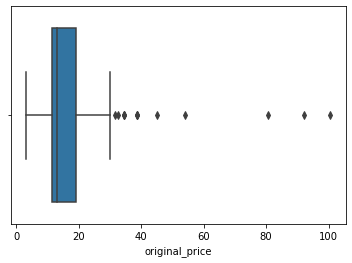

In [665]:
sns.boxplot(x='original_price', data=book_depo)
plt.show()

We can see the boxplot is not symmetrical and also there are outliers in the graph. These values are not wrong because these are possible prices of any product, so we do not need to make any change there

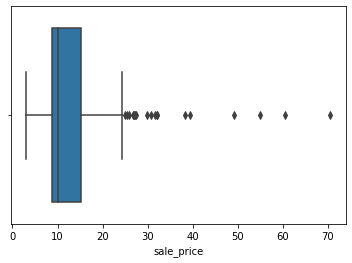

In [671]:
sns.boxplot(x='sale_price', data=book_depo)
plt.show()

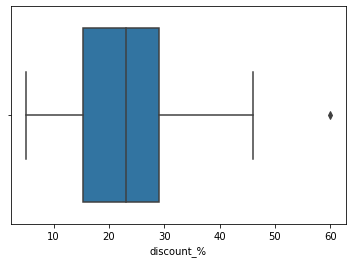

In [666]:
sns.boxplot(x='discount_%', data=book_depo)
plt.show()

From the above diagram discount percentage is not symmetrical(the IQR is somewhat skewed to the right) and ther is an outlier. I think we do not need to worry about it as 60% discount is a practical value.

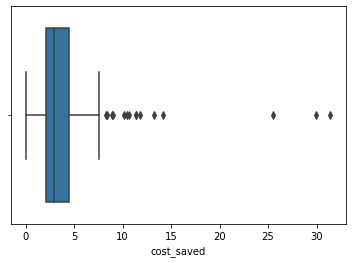

In [672]:
sns.boxplot(x='cost_saved', data=book_depo)
plt.show()

As we seen in previous examples these are possible values seen as outliers no need to make any changes here

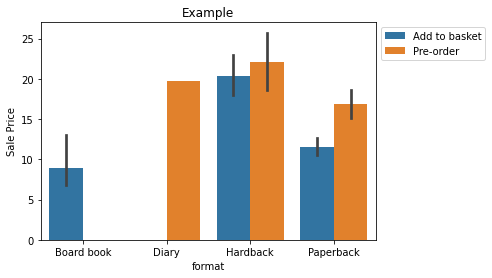

In [649]:
sns.barplot(x="format", y="sale_price", hue="order_type", data = book_depo)
plt.xlabel("format")
plt.ylabel("Sale Price")
plt.title("Example")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

From the above graph it's evident that , most sale price is for hard back and least is for board book and diary. Also pre-oder is more in book depository website

Pre-order sale prices are more compared to add to basket purchases in available books.

Diaries are the least in terms of sale price

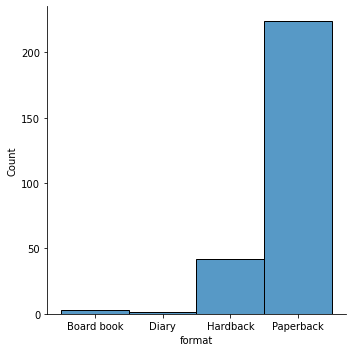

Paperback     224
Hardback       42
Board book      3
Diary           1
Name: format, dtype: int64

In [650]:
sns.displot(book_depo['format'])
plt.show()

format_counts = book_depo['format'].value_counts()
format_counts

Paperpacks are major in the book sale. least one is the diary.

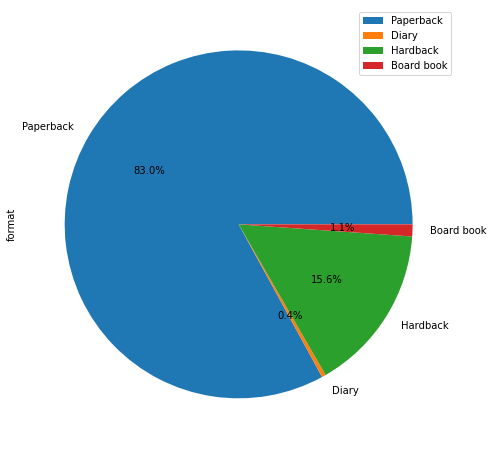

In [651]:
# Drawing a pie chart to analyze the data here
stat_counts = book_depo['format'].value_counts()
#then a dataframe with the counts in it
ptd2 = pd.DataFrame({'format': stat_counts},
 index = ['Paperback', 'Diary', 'Hardback','Board book']
 )

ptd2.plot.pie(y='format', figsize=(8,8), autopct='%1.1f%%')
plt.show()

Out of 234 books , 200 are paper bags. we can see there is a huge difference. major part is paperback and a small 32 number is hardback

There is only 1 each of diary and board book

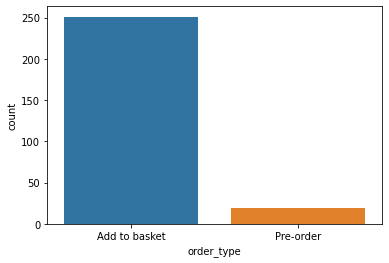

Add to basket    251
Pre-order         19
Name: order_type, dtype: int64

In [652]:
sns.countplot(x = 'order_type', data = book_depo)
plt.show()

oder_type_count = book_depo['order_type'].value_counts()
oder_type_count

Major portion of the books are add to cart, very small number of books are available for pre-order

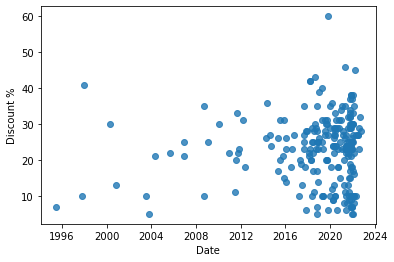

In [653]:
sns.regplot(x='date', y= 'discount_%', data = book_depo, fit_reg = False)
plt.xlabel("Date")
plt.ylabel("Discount %")
plt.show()


We can see books after 2016 are more numbers & the dicounts are clustered between 2016 and 2022. I just wanna check if the counts are more after 2012.

In [654]:
start_date = '2012-01-01'
end_date = '2024-01-01'
mask = (book_depo['date'] > start_date) & (book_depo['date'] <= end_date)
count_new = book_depo.loc[mask]
count_new.count()

book_name         246
format            246
date              246
author            246
original_price    228
sale_price        246
cost_saved        228
discount_%        217
order_type        246
dtype: int64

In [655]:
start_d = '1990-01-01'
end_d = '2011-12-30'
mask1 = (book_depo['date'] > start_d) & (book_depo['date'] <= end_d)
count_new = book_depo.loc[mask1]


In [656]:
count_new.count()

book_name         24
format            24
date              24
author            24
original_price    21
sale_price        24
cost_saved        21
discount_%        21
order_type        24
dtype: int64

As I suspected it's true, most of the book in depository are after 2012 that's why we noticed cluster towards 2021

In [657]:
author_number = book_depo['author'].unique()
print(len(author_number))

189


There are 164 authors only written 234 books

In [658]:
book_depo['author'].value_counts()[:5].sort_values(ascending=False)

Mo Xiang Tong Xiu    10
Colleen Hoover        9
Andrzej Sapkowski     9
Gege Akutami          7
J.K. Rowling          5
Name: author, dtype: int64

Mo Xiang Tong Xiu is the person with highest number of books. above list shows authors with top 5 most number of books

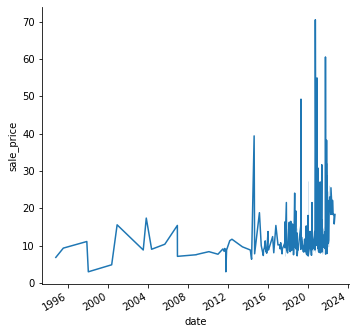

In [659]:
g = sns.relplot(x="date", y="sale_price", kind="line", data=book_depo)
g.fig.autofmt_xdate()

From the above graph,we can see that the sale price has increased over time and most books are released after 2016

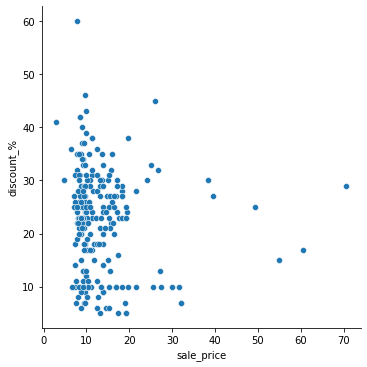

In [660]:
sns.relplot(x="sale_price", y="discount_%", data=book_depo);

Most Products with 10 to 20 sale price have most discounts. but it does not show any relatioship between sale price and discount

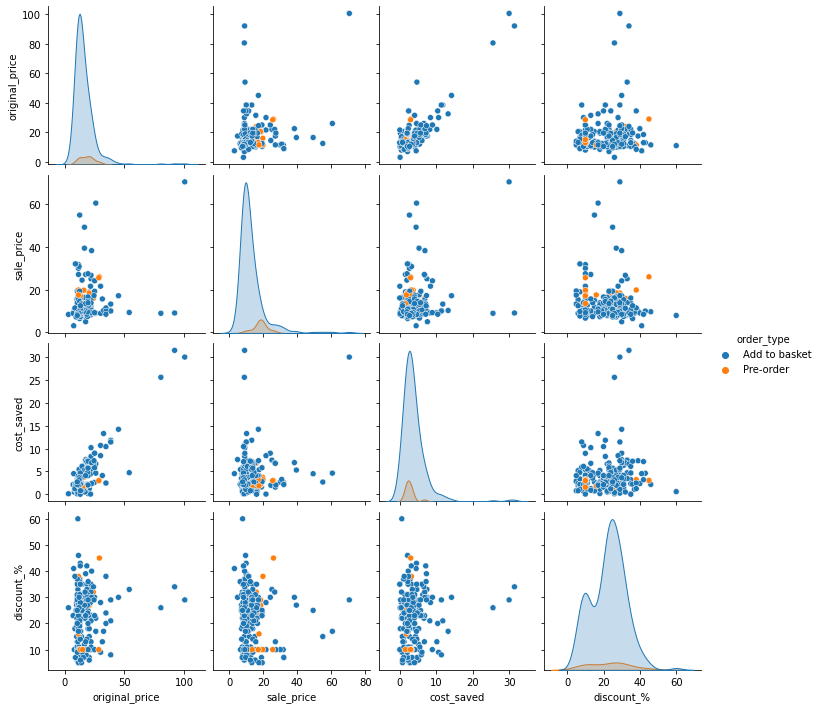

In [661]:
sns.pairplot(book_depo, hue="order_type")

Comparing all the diagrams I can see there is a linear relatioship between original price and cost saved. I think people purchase books with more original rate gets more discount. that's the reason for this.

### Results

<div style="background-color:powderblue; padding-left: 12px !important;"><br><br><b>Final Study</b>
    
Scraping is done from bookdepository.com, using beautiful soup data has been collected and stored into the pandas dataframe.
I took data from first 9 pages. each page contains 30 books each so total 270 books information is collected for this project.

Data cleaning was the second stage, from the data collected appropriate information has been extracted using python. Data types are corrected before hand to the pandas dataframe generation. missing columns are manually checked on the bookdepository websie and inserted NaN values to maintain data accuracy.

After cleaningall the data has been combined and added to a final dataset called 'book_depo', NaN values treated as required values considering the website behaviour(as explained in previous section).

Created different univariate, bivariate and multivariate graphs for the visualization and interpretation. Univariate plots showed outliers but all the values were acceptable(as explained in previous section). 

Comparing different plots found an interesting fact that there is a linear relatioship going on between original price and cost_saved(further co-relation tests are advised to prove this assumption, not doing it here as it's not relevant for this project).

Also the graphs showed most of the books available in bookdepository are released after2012 . 

Also it's interesting to see 189 Authors wrote 270 books  which means one author have written multiple books in this sample. Out of 270 books 10 books are written by Mo Xiang Tong Xiu & that is most number of books written by an author in the collected sample.

Looking at the book format 224 books approximately 83% of total books are paperpacks. so we can say that company is mostly selling paperpacks.


Out of 270 books 251 books are add to basket purchase compared to pre-ordering, though these informations might not be a significant finding I just wanted to see what kind of sales behaviour is being done in bookdepository.

The most interesting fact is that products cost between 10 to 20 are the major part of the book sale and they have more discount as well.<br><br><br>
